<a href="https://colab.research.google.com/github/Hamifthi/100_days_of_machinelearning/blob/master/cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

In [4]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [5]:
!pip install kaggle
!rm -r sample_data
!mkdir .kaggle

rm: cannot remove 'sample_data': No such file or directory


In [0]:
import json
token = {"username":"hamiai","key":"5b08bc78a0da0576451c203c1c42f91a"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [8]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


In [9]:
!kaggle competitions download -c histopathologic-cancer-detection -p /content/

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 89.4MB/s]
  0% 0.00/5.10M [00:00<?, ?B/s]
100% 5.10M/5.10M [00:00<00:00, 168MB/s]
 99% 1.30G/1.30G [00:09<00:00, 132MB/s]
100% 1.30G/1.30G [00:09<00:00, 141MB/s]
100% 4.97G/4.98G [00:36<00:00, 190MB/s]
100% 4.98G/4.98G [00:36<00:00, 146MB/s]


In [10]:
!unzip -qq /content/test.zip -d /content/data/test
!rm /content/test.zip
!unzip -qq /content/train.zip -d /content/data/train
!rm /content/train.zip
!unzip -qq /content/train_labels.csv.zip -d /content/data
!rm /content/train_labels.csv.zip
!ls

data  gdrive  models  sample_submission.csv.zip


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = './data'
path_to_train_images = './data/train'

In [0]:
!mv data/train_labels.csv data/train/labels.csv

In [0]:
np.random.seed(44)
data = ImageDataBunch.from_csv(path_to_train_images, suffix='.tif', size = 229, bs = 64)

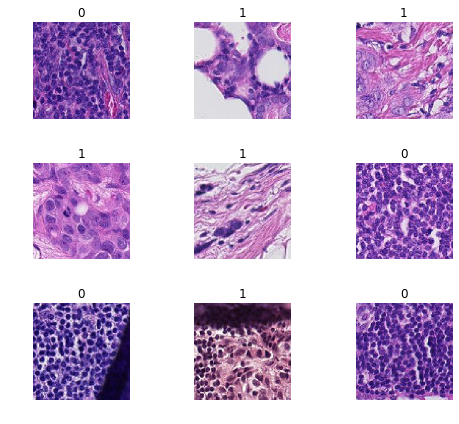

In [15]:
data.show_batch(rows = 3, figsize=(7, 6))

In [0]:
data.normalize()

In [17]:
model = create_cnn(data, models.resnet50, metrics = accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 46742370.37it/s]


In [0]:
model.load(root_dir + 'resnet50_first_big_run_2')

In [0]:
# model.unfreeze()
model.summary()

In [32]:
model.fit_one_cycle(5, max_lr = slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.127765,0.183067,0.958187,38:18
1,0.100280,0.098642,0.967163,38:17
2,0.062697,0.077271,0.974548,38:17
3,0.020610,0.080853,0.976889,38:20
4,0.005691,0.087414,0.979093,38:19


In [0]:
model.save(root_dir + 'resnet50_first_big_run_3')

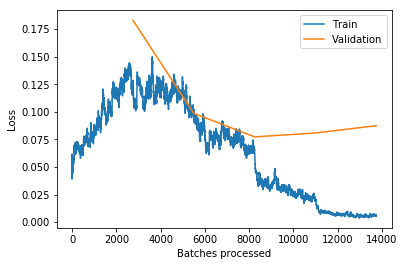

In [37]:
model.recorder.plot_losses()